In [1]:
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import scanpy as sc

In [2]:
from sklearn.metrics import f1_score

In [3]:
import mgitools.os_helpers as os_helpers

In [10]:
module_fps = sorted(os_helpers.listfiles('../benchmarking/sandbox/general_v2/'))
module_fps = [fp for fp in module_fps if '.' not in fp.split('/')[-1]]
module_fps

['../benchmarking/sandbox/general_v2/scRNAseq',
 '../benchmarking/sandbox/general_v2/scRNAseq_brca_cesc_hnscc_melanoma_myeloma',
 '../benchmarking/sandbox/general_v2/scRNAseq_brca_cesc_hnscc_melanoma_pdac',
 '../benchmarking/sandbox/general_v2/scRNAseq_brca_cesc_hnscc_myeloma_pdac',
 '../benchmarking/sandbox/general_v2/scRNAseq_brca_cesc_melanoma_myeloma_pdac',
 '../benchmarking/sandbox/general_v2/scRNAseq_brca_hnscc_melanoma_myeloma_pdac',
 '../benchmarking/sandbox/general_v2/scRNAseq_cesc_hnscc_melanoma_myeloma_pdac',
 '../benchmarking/sandbox/general_v2/snATACseq_gene_activity',
 '../benchmarking/sandbox/general_v2/snATACseq_motif',
 '../benchmarking/sandbox/general_v2/snRNAseq']

In [13]:
general_fps = sorted(os_helpers.listfiles('../benchmarking/sandbox/general_v2/', regex=r'.txt'))
general_fps

['../benchmarking/sandbox/general_v2/scRNAseq.txt',
 '../benchmarking/sandbox/general_v2/scRNAseq_brca_cesc_hnscc_melanoma_myeloma.txt',
 '../benchmarking/sandbox/general_v2/scRNAseq_brca_cesc_hnscc_melanoma_pdac.txt',
 '../benchmarking/sandbox/general_v2/scRNAseq_brca_cesc_hnscc_myeloma_pdac.txt',
 '../benchmarking/sandbox/general_v2/scRNAseq_brca_cesc_melanoma_myeloma_pdac.txt',
 '../benchmarking/sandbox/general_v2/scRNAseq_brca_hnscc_melanoma_myeloma_pdac.txt',
 '../benchmarking/sandbox/general_v2/scRNAseq_cesc_hnscc_melanoma_myeloma_pdac.txt',
 '../benchmarking/sandbox/general_v2/snATACseq_gene_activity.txt',
 '../benchmarking/sandbox/general_v2/snATACseq_motif.txt',
 '../benchmarking/sandbox/general_v2/snRNAseq.txt']

In [17]:
specific_fps = sorted(os_helpers.listfiles('../benchmarking/results/01272021_harmonized_v2/', regex=r'pollock.tsv'))
specific_fps

['../benchmarking/results/01272021_harmonized_v2/scRNAseq/brca/pollock.tsv',
 '../benchmarking/results/01272021_harmonized_v2/scRNAseq/cesc/pollock.tsv',
 '../benchmarking/results/01272021_harmonized_v2/scRNAseq/hnscc/pollock.tsv',
 '../benchmarking/results/01272021_harmonized_v2/scRNAseq/melanoma/pollock.tsv',
 '../benchmarking/results/01272021_harmonized_v2/scRNAseq/myeloma/pollock.tsv',
 '../benchmarking/results/01272021_harmonized_v2/scRNAseq/pdac/pollock.tsv',
 '../benchmarking/results/01272021_harmonized_v2/snATACseq/brca_gene_activity/pollock.tsv',
 '../benchmarking/results/01272021_harmonized_v2/snATACseq/brca_motif/pollock.tsv',
 '../benchmarking/results/01272021_harmonized_v2/snATACseq/ccrcc_gene_activity/pollock.tsv',
 '../benchmarking/results/01272021_harmonized_v2/snATACseq/ccrcc_motif/pollock.tsv',
 '../benchmarking/results/01272021_harmonized_v2/snATACseq/gbm_gene_activity/pollock.tsv',
 '../benchmarking/results/01272021_harmonized_v2/snATACseq/gbm_motif/pollock.tsv',
 '

##### scRNAseq specific comparison

In [22]:
gen = [fp for fp in general_fps if '_' in fp.split('/')[-1] if 'scRNAseq' in fp]
gen

['../benchmarking/sandbox/general_v2/scRNAseq_brca_cesc_hnscc_melanoma_myeloma.txt',
 '../benchmarking/sandbox/general_v2/scRNAseq_brca_cesc_hnscc_melanoma_pdac.txt',
 '../benchmarking/sandbox/general_v2/scRNAseq_brca_cesc_hnscc_myeloma_pdac.txt',
 '../benchmarking/sandbox/general_v2/scRNAseq_brca_cesc_melanoma_myeloma_pdac.txt',
 '../benchmarking/sandbox/general_v2/scRNAseq_brca_hnscc_melanoma_myeloma_pdac.txt',
 '../benchmarking/sandbox/general_v2/scRNAseq_cesc_hnscc_melanoma_myeloma_pdac.txt']

In [40]:
import pandas as pd
import numpy as np
df_map = {}
for fp in [x for x in specific_fps if 'scRNAseq' in x]:
    disease = fp.split('/')[-2]
    df1 = pd.read_csv([x for x in gen if disease not in x][0], sep='\t')
    df2 = pd.read_csv(fp, sep='\t')
    df1.columns = [f'general_{c}' for c in df1.columns]
    df2.columns = [f'specific_{c}' for c in df2.columns]
    source = pd.concat((df1, df2), axis=1)
    source = source[['general_cell_id', 'general_groundtruth', 'specific_predicted', 'general_predicted']]
    source.columns = ['cell_id', 'groundtruth', 'specific_predicted', 'general_predicted']
    df_map[disease] = {
        'general': pd.read_csv([x for x in gen if disease not in x][0], sep='\t'),
        'specific': pd.read_csv(fp, sep='\t'),
        'source': source
    }
    

In [57]:
df_map['cesc']['general']

,cell_id,cell_id.1,groundtruth,predicted,probability
0,AAACCCATCTACAGGT-1_1-1-0-0-0-0-0-0-0-0,AAACCCATCTACAGGT-1_1-1-0-0-0-0-0-0-0-0,Monocyte,Monocyte,0.71
1,AAAGGATGTTCCGTTC-1_1-1-0-0-0-0-0-0-0-0,AAAGGATGTTCCGTTC-1_1-1-0-0-0-0-0-0-0-0,Mast,Treg,0.38
2,AAAGGGCGTTTCGGCG-1_1-1-0-0-0-0-0-0-0-0,AAAGGGCGTTTCGGCG-1_1-1-0-0-0-0-0-0-0-0,Endothelial,Endothelial,0.95
3,AAAGGGCTCCAAGCCG-1_1-1-0-0-0-0-0-0-0-0,AAAGGGCTCCAAGCCG-1_1-1-0-0-0-0-0-0-0-0,Fibroblast,Fibroblast,0.39
4,AAAGTGAGTACAACGG-1_1-1-0-0-0-0-0-0-0-0,AAAGTGAGTACAACGG-1_1-1-0-0-0-0-0-0-0-0,Mast,CD4 T cell,0.29
...,...,...,...,...,...
3771,TTTGGAGGTCGATGCC-1_9-1-0-0-0-0-0-0-0-0,TTTGGAGGTCGATGCC-1_9-1-0-0-0-0-0-0-0-0,NK,Malignant,0.30
3772,TTTGGTTTCTGCTCTG-1_9-1-0-0-0-0-0-0-0-0,TTTGGTTTCTGCTCTG-1_9-1-0-0-0-0-0-0-0-0,NK,Malignant,0.19
3773,TTTGTTGCAATAACGA-1_9-1-0-0-0-0-0-0-0-0,TTTGTTGCAATAACGA-1_9-1-0-0-0-0-0-0-0-0,Fibroblast,Fibroblast,0.38
3774,TTTGTTGGTTTGCAGT-1_9-1-0-0-0-0-0-0-0-0,TTTGTTGGTTTGCAGT-1_9-1-0-0-0-0-0-0-0-0,NK,CD8 T cell,0.20


In [58]:
df_map['cesc']['specific']

,cell_id,groundtruth,predicted,probability
0,AAACCCATCTACAGGT-1_1,Monocyte,Monocyte,0.99
1,AAAGGATGTTCCGTTC-1_1,Mast,Mast,0.45
2,AAAGGGCGTTTCGGCG-1_1,Endothelial,Endothelial,0.93
3,AAAGGGCTCCAAGCCG-1_1,Fibroblast,Fibroblast,0.66
4,AAAGTGAGTACAACGG-1_1,Mast,Mast,0.72
...,...,...,...,...
4271,TTTGGAGGTCGATGCC-1_9,NK,NK,1.00
4272,TTTGGTTTCTGCTCTG-1_9,NK,NK,1.00
4273,TTTGTTGCAATAACGA-1_9,Fibroblast,Fibroblast,1.00
4274,TTTGTTGGTTTGCAGT-1_9,NK,NK,1.00


In [59]:
f1_score(df_map['cesc']['specific']['groundtruth'], df_map['cesc']['specific']['predicted'], average='weighted')

0.9519037365622558

In [43]:
df_map['brca']['source']

,cell_id,groundtruth,specific_predicted,general_predicted
0,_HT062B1_S1PA_AACCAACTCCACTAGA-1-1-0-0-0-0-0-0...,Endothelial,Endothelial,Endothelial
1,_HT062B1_S1PA_AACCCAAAGACGAGCT-1-1-0-0-0-0-0-0...,NK,NK,NK
2,_HT062B1_S1PA_AACGTCAGTTTACACG-1-1-0-0-0-0-0-0...,Endothelial,Endothelial,Endothelial
3,_HT062B1_S1PA_AACTTCTGTCCAGAAG-1-1-0-0-0-0-0-0...,CD8 T cell,NK,CD8 T cell
4,_HT062B1_S1PA_AAGCCATAGTGATTCC-1-1-0-0-0-0-0-0...,Endothelial,Endothelial,Endothelial
...,...,...,...,...
5743,_HT171B1_BC2_TTTATGCCAGCCCAGT-1-1-0-0-0-0-0-0-...,Fibroblast,Fibroblast,Fibroblast
5744,_HT171B1_BC2_TTTCATGGTCGACTTA-1-1-0-0-0-0-0-0-...,Treg,Treg,Treg
5745,_HT171B1_BC2_TTTCCTCGTTAGCGGA-1-1-0-0-0-0-0-0-...,Treg,Treg,Treg
5746,_HT171B1_BC2_TTTGACTCATGGGATG-1-1-0-0-0-0-0-0-...,Plasma,Plasma,Plasma


In [128]:
data = []
for disease, d in df_map.items():
    xs, ys = zip(*[(x, y) for x, y in zip(d['specific']['groundtruth'], d['specific']['predicted'])
                if not pd.isnull(x) and not pd.isnull(y)])
    specific_f1 = f1_score(xs, ys, average='weighted')
    xs, ys = zip(*[(x, y) for x, y in zip(d['general']['groundtruth'], d['general']['predicted'])
                if not pd.isnull(x) and not pd.isnull(y)])
    general_f1 = f1_score(xs, ys, average='weighted')
    data.append([disease, 'specific', specific_f1])
    data.append([disease, 'general', general_f1])
df = pd.DataFrame(data=data, columns=['Disease', 'Model type', 'F1 score'])
df

,Disease,Model type,F1 score
0,brca,specific,0.850659
1,brca,general,0.695186
2,cesc,specific,0.951904
3,cesc,general,0.555724
4,hnscc,specific,0.860325
5,hnscc,general,0.736513
6,melanoma,specific,0.924106
7,melanoma,general,0.845217
8,myeloma,specific,0.910520
9,myeloma,general,0.663877


In [129]:
chart = alt.Chart(df).mark_rect().encode(
    x=alt.X('Model type:N'),
    y=alt.Y('Disease:N'),
    color=alt.Color('F1 score:Q', scale=alt.Scale(zero=True, scheme='viridis'))
)
chart

alt.Chart(...)

In [138]:
c1 = alt.Chart(df)
c1 = c1.mark_tick(thickness=2,).encode(
    y=alt.Y(f'F1 score:Q'),
    x=alt.X(f'Disease:N', scale=alt.Scale(zero=True), axis=alt.Axis(grid=False)),
    color=alt.Color('Model type:N')
)

c2 = alt.Chart(df)
c2 = c2.mark_point().encode(
    y=alt.Y(f'F1 score:Q'),
    x=alt.X(f'Disease:N', scale=alt.Scale(zero=True)),
    color=alt.Color('Model type:N')
)

chart = c1 + c2

chart

alt.LayerChart(...)

In [91]:
keep = ['scRNAseq', 'snRNAseq', 'snATACseq_gene_activity']
fps = [fp for fp in general_fps if fp.split('/')[-1].split('.')[0] in keep]
fps

['../benchmarking/sandbox/general_v2/scRNAseq.txt',
 '../benchmarking/sandbox/general_v2/snATACseq_gene_activity.txt',
 '../benchmarking/sandbox/general_v2/snRNAseq.txt']

In [92]:
d = {
    'scRNAseq': '../benchmarking/sandbox/general_v2/scRNAseq.txt',
    'snRNAseq': '../benchmarking/sandbox/general_v2/snRNAseq.txt',
    'snATACseq': '../benchmarking/sandbox/general_v2/snATACseq_gene_activity.txt'
}

In [93]:
master = None
for disease, fp in d.items():
    df = pd.read_csv(fp, sep='\t')
    df['disease'] = disease
    if master is None:
        master = df
    else:
        master = pd.concat((master, df), axis=0)
master

,cell_id,cell_id.1,groundtruth,predicted,probability,disease
0,_HT062B1_S1PA_AACCAACTCCACTAGA-1-1-0-0-0-0-0-0...,_HT062B1_S1PA_AACCAACTCCACTAGA-1-1-0-0-0-0-0-0...,Endothelial,Endothelial,0.83,scRNAseq
1,_HT062B1_S1PA_AACCCAAAGACGAGCT-1-1-0-0-0-0-0-0...,_HT062B1_S1PA_AACCCAAAGACGAGCT-1-1-0-0-0-0-0-0...,NK,NK,0.79,scRNAseq
2,_HT062B1_S1PA_AACGTCAGTTTACACG-1-1-0-0-0-0-0-0...,_HT062B1_S1PA_AACGTCAGTTTACACG-1-1-0-0-0-0-0-0...,Endothelial,Endothelial,0.80,scRNAseq
3,_HT062B1_S1PA_AACTTCTGTCCAGAAG-1-1-0-0-0-0-0-0...,_HT062B1_S1PA_AACTTCTGTCCAGAAG-1-1-0-0-0-0-0-0...,CD8 T cell,CD8 T cell,0.64,scRNAseq
4,_HT062B1_S1PA_AAGCCATAGTGATTCC-1-1-0-0-0-0-0-0...,_HT062B1_S1PA_AAGCCATAGTGATTCC-1-1-0-0-0-0-0-0...,Endothelial,Endothelial,0.91,scRNAseq
...,...,...,...,...,...,...
7390,C3N-03186_CPT0206880004_2020-06-22_CTCTAGCCACA...,C3N-03186_CPT0206880004_2020-06-22_CTCTAGCCACA...,Malignant,Malignant,0.93,snATACseq
7391,C3N-03186_CPT0206880004_2020-06-22_ACGTGGCTCCT...,C3N-03186_CPT0206880004_2020-06-22_ACGTGGCTCCT...,Neuron,Neuron,0.93,snATACseq
7392,C3N-03186_CPT0206880004_2020-06-22_CATTCCGTCTC...,C3N-03186_CPT0206880004_2020-06-22_CATTCCGTCTC...,Neuron,Neuron,1.00,snATACseq
7393,C3N-03186_CPT0206880004_2020-06-22_TATTGCTCACG...,C3N-03186_CPT0206880004_2020-06-22_TATTGCTCACG...,Neuron,Neuron,0.46,snATACseq


In [125]:
from sklearn.metrics import confusion_matrix
def get_confusion_matrix(fp):
    df = pd.read_csv(fp, sep='\t')
    order = sorted(set(df['groundtruth']))
    order += sorted(set(df['predicted']))
    order = sorted(set(order))
    cm = confusion_matrix(df['groundtruth'], df['predicted'], labels=order)
    print(f1_score(df['groundtruth'], df['predicted'], average='weighted'))
    cm = pd.DataFrame(data=cm / np.sum(cm, axis=1), columns=order, index=order)
    cm = cm[np.sum(cm.values, axis=1).flatten()!=0]
    
    return cm

palette_map = {
    'scRNAseq': 'blues',
    'snRNAseq': 'oranges',
    'snATACseq': 'greens',
}
def get_altair_confusion_matrix(fp, title=''):
    cm = get_confusion_matrix(fp)
    
    data = []
    for c1 in cm.index:
        for c2 in cm.columns:
            data.append([c1, c2, cm.loc[c1, c2]])
    pdf = pd.DataFrame(data=data, columns=['Groundtruth', 'Predicted', 'Fraction of cells'])
    chart = alt.Chart(pdf, title=title).mark_rect().encode(
        x=alt.X('Predicted:O'),
        y=alt.Y('Groundtruth:O'),
        color=alt.Color('Fraction of cells', scale=alt.Scale(zero=True, scheme=palette_map[title]))
    )
    return chart

In [126]:
combined = None
for dtype, fp in d.items():
    chart = get_altair_confusion_matrix(fp, title=dtype)
    
    if combined is None:
        combined = chart
    else:
        combined = alt.hconcat(combined, chart)
combined
    

0.8468911023301452
0.8927478746950221
0.8436924391848541


alt.HConcatChart(...)

In [110]:
cm = get_confusion_matrix(d['scRNAseq'])
cm

,Acinar,B cell,CD4 T cell,CD8 T cell,Dendritic,Endothelial,Erythrocyte,Fibroblast,Islet,Malignant,Mast,Monocyte,NK,Plasma,Platlete,Treg,Tuft
Acinar,0.844,0.0008,0.002333,0.002667,0.000000,0.006351,0.001323,0.002502,0.000,0.014000,0.000000,0.000333,0.000365,0.000481,0.00,0.000000,0.000000
B cell,0.000,0.9624,0.006333,0.003333,0.015480,0.000000,0.001323,0.000000,0.000,0.004667,0.001563,0.002667,0.002919,0.005294,0.00,0.000537,0.000000
CD4 T cell,0.000,0.0088,0.773333,0.118667,0.002322,0.000000,0.001323,0.005629,0.004,0.015333,0.005469,0.005000,0.018971,0.003369,0.00,0.085929,0.000000
CD8 T cell,0.000,0.0052,0.117000,0.756000,0.000774,0.001155,0.000000,0.000625,0.000,0.004000,0.001563,0.002333,0.071507,0.004812,0.00,0.073577,0.000000
Dendritic,0.000,0.0032,0.000333,0.003333,0.729102,0.000000,0.003968,0.001251,0.000,0.002667,0.000781,0.085000,0.021525,0.001444,0.00,0.000000,0.000000
Endothelial,0.004,0.0004,0.000000,0.000000,0.000000,0.937067,0.005291,0.030019,0.000,0.015333,0.001563,0.000000,0.001094,0.001444,0.00,0.000000,0.000000
Erythrocyte,0.008,0.0148,0.024000,0.024667,0.000774,0.034065,0.523810,0.008130,0.000,0.006667,0.001563,0.017000,0.004743,0.004812,0.00,0.002148,0.000000
Fibroblast,0.000,0.0000,0.001000,0.000000,0.000774,0.008083,0.000000,0.923077,0.032,0.025333,0.000781,0.000000,0.000365,0.005294,0.00,0.000000,0.000000
Islet,0.000,0.0008,0.002000,0.000333,0.000000,0.003464,0.005291,0.005003,0.868,0.011000,0.001563,0.000000,0.000000,0.000481,0.00,0.001611,0.000000
Malignant,0.022,0.0028,0.002333,0.001333,0.000774,0.004619,0.009259,0.026266,0.002,0.930333,0.000000,0.007000,0.001459,0.046198,0.00,0.000000,0.000000


<AxesSubplot:>

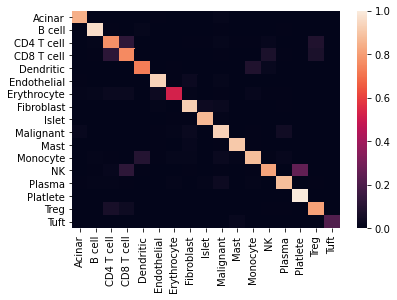

In [111]:
sns.heatmap(cm)

In [112]:
data = []
for c1 in cm.index:
    for c2 in cm.columns:
        data.append([c1, c2, cm.loc[c1, c2]])
pdf = pd.DataFrame(data=data, columns=['Groundtruth', 'Predicted', 'Fraction of cells'])
pdf

,Groundtruth,Predicted,Fraction of cells
0,Acinar,Acinar,0.844000
1,Acinar,B cell,0.000800
2,Acinar,CD4 T cell,0.002333
3,Acinar,CD8 T cell,0.002667
4,Acinar,Dendritic,0.000000
...,...,...,...
284,Tuft,NK,0.000000
285,Tuft,Plasma,0.000000
286,Tuft,Platlete,0.000000
287,Tuft,Treg,0.000000


In [114]:
chart = alt.Chart(pdf).mark_rect().encode(
    x=alt.X('Predicted:O'),
    y=alt.Y('Groundtruth:O'),
    color=alt.Color('Fraction of cells', scale=alt.Scale(zero=True, scheme='Blues'))
)
chart

alt.Chart(...)